In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [44]:
#1.	Sklearn datasets의 iris data를 불러와서, Pandas DataFrame으로 바꾸세요.
iris = load_iris()
iris_ndarray = iris.data
iris_df = pd.DataFrame(data = iris_ndarray, columns=iris.feature_names)
iris_df['label'] = iris.target

In [45]:
#2.	1번의 데이터에 결측치가 있는지 체크하고, 결측치가 존재하면 평균값을 넣으세요.
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [47]:
#3.1번의 데이터의 평균, 표준편차, 4분위 수를 구하세요. Label의 값을 1이면 1, 1이 아니면 0으로 수정하세요.
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [48]:
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [69]:
iris_df.loc[iris_df['label']!=1, 'label'] = 0
iris_df['label'].value_counts()

0    100
1     50
Name: label, dtype: int64

In [51]:
#4.	train set과 test set을 train_test_split을 사용하여 test size을 0.25만큼 분리하세요
x = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=11)

In [56]:
#5.	위에서 만든 train set을 RandomForestClassifier기본 파라메터를 사용하여 학습하고, 정확도(accuracy)를 구하세요.
rf = RandomForestClassifier(random_state=11)
rf.fit(x_train, y_train)
predicted = rf.predict(x_test)
print('RandomForest Accuracy Score :{0:.4f}'.format(accuracy_score(y_test, predicted)))

RandomForest Accuracy Score :0.9211


In [66]:
#6.	train set을 RandomForestClassifier 기본 파라메터를 사용하여 학습하고, 오차행렬, 정밀도와 재현율, F1 스코어를 구하고 ROC커브를 그리세요.
pred_proba = rf.predict_proba(x_test)[:,1]

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, predicted, pred_proba)

오차 행렬
[[25  2]
 [ 1 10]]
정확도: 0.9211, 정밀도: 0.8333, 재현율: 0.9091,    F1: 0.8696, AUC:0.9697


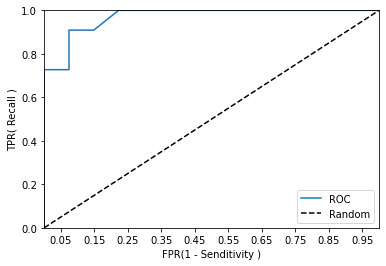

In [64]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1 - Senditivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()

roc_curve_plot(y_test, pred_proba)

In [ ]:
#7.	6번의 결과 중 2종 오류를 범하기 않기 위해서 주의 깊게 봐야하는 것은 무엇인가요?

#2종 오류 : FN
#재현율을 보아야함

In [74]:
#8.	4번의 데이터를 Get_dummies를 사용해 iris data의 label을 범주형데이터로 바꿔서 기존 df에 붙이고, 기존의 label은 df에서 삭제하세요.
iris_df = pd.get_dummies(iris_df)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [75]:
#9.	8번의 데이터를 GridSearchCV를 사용해서 RandomForestClassifier을 교차검증과 최적 파라메터 튜닝을 수행하여, 정확도를 다시 구하세요.
#cross validation

x = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=11)

rf = RandomForestClassifier(random_state=11)
rf.fit(x_train, y_train)
predicted = rf.predict(x_test)
print('RandomForest Accuracy Score :{0:.4f}'.format(accuracy_score(y_test, predicted)))

params = { 'n_estimators' : [10, 100],
           'max_depth' : [3, 5, 7,],
           'min_samples_leaf' : [8, 12],
           'min_samples_split' : [8, 16]
            }


grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', n_jobs=4)
grid_rf.fit(x_train, y_train)

print('GridSearchCV optimized hyper parameter :', grid_rf.best_params_)
print('GridSearchCV best accuracy : {0:.4f}'.format(grid_rf.best_score_))
best_rf = grid_rf.best_estimator_

dpredictions = best_rf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('test set for RandomForest accuracy : {0:.4f}'.format(accuracy))

RandomForest Accuracy Score :0.9211
GridSearchCV optimized hyper parameter : {'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
GridSearchCV best accuracy : 0.9648
test set for RandomForest accuracy : 0.8684


In [76]:
#cross validation
scores = cross_val_score(rf, x, y, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("Cross Validation: {0} Accuracy: {1:.4f}".format(iter_count, accuracy))
    
print("Average Accuracy : {0:.4f}".format(np.mean(scores)))

Cross Validation: 0 Accuracy: 1.0000
Cross Validation: 1 Accuracy: 1.0000
Cross Validation: 2 Accuracy: 0.8667
Cross Validation: 3 Accuracy: 0.9333
Cross Validation: 4 Accuracy: 0.9667
Average Accuracy : 0.9533


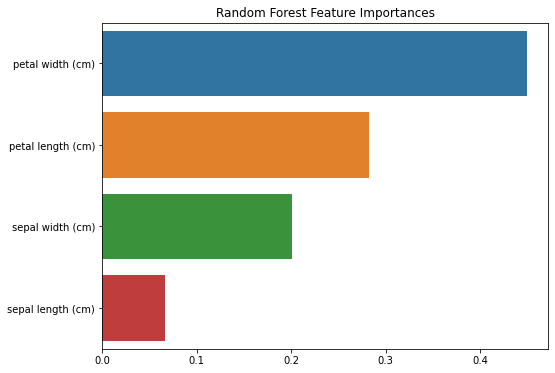

In [83]:
#10.	9번에서 학습한 모델 결과의 각 피쳐별 중요도를 그래프로 보이세요.
#(rf_clf.feature_importances_)

ftr_importances = pd.Series(rf.feature_importances_, index = x_train.columns)
plt.figure(figsize=(8,6))
plt.title('Random Forest Feature Importances')
sns.barplot(x=ftr_importances.sort_values(ascending=False), y=ftr_importances.sort_values(ascending=False).index)
plt.show()